## 목표
 - 타이타닉 데이터를 활용하여 생존자/사망자 예측해보자
 - kaggle 경진대회에 참가하여 우리 점수를 확인해보자
 - 머신러닝의 전체 과정을 체험해보자
 
## 머신러닝 과정
 - 1. 문제정의 : 목표 설정, 어떤 모델
 - 2. 데이터 수집 : 분류를 할거라면 class로 담긴 레이블이 있는 데이터 수집
 - 3. 데이터 전처리 : 이상치/결측치 처리
 - 4. 데이터 탐색 (탐색적 데이터 분석) : 기술 통계, 특성 간의 관계
 - 5. 모델 선택 및 하이퍼 파라미터 설정
 - 6. 모델 예측 및 평가
 - 7. 모델 서비스화

https://www.kaggle.com/competitions/titanic/data?select=train.csv
- train- 학습용 문제, 답
- test - 테스트용 문제  -> 답은 kaggle 가지고 있음
- pre 잘했는지 평가하기 위해서 kaggle 업로드
- submission - pre를 제출하기 위한 답안지 파일 
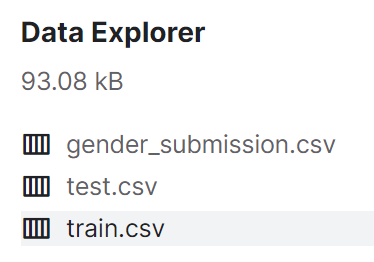

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# train, test 변수에 데이터 불러와서 담기
# (단, 인덱스를 승객의 번호로 설정해서 담아줄 것)
train = pd.read_csv('./data/titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('./data/titanic/test.csv', index_col='PassengerId')
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


 0.   Survived  - 생존/ 사망 여부 (답 데이터, Class Label)
 1.   Pclass    - 승객의 등급(1- 귀족층,2- 중간층,3- 하위계층)
 2.   Name      - 이름      
 3.   Sex       - 성별(male, female)
 4.   Age       - 나이(0~
 5.   SibSp     - 형제자매+배우자 수
 6.   Parch     - 부모 + 자식 수
 7.   Ticket    - 티겟 번호
 8.   Fare      - 요금
 9.   Cabin     - 객실번호
 10.  Embarked  - 승선항

In [4]:
print(train.shape, test.shape) # test 정답 데이터 x(-1)
print(train.columns)
print(test.columns)

(891, 11) (418, 10)
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


#### 데이터 전처리 및 데이터 탐색
##### 결측치 확인

In [5]:
# info 함수 통해서 train 결측치 확인
# 결측치 존재 컬럼 : Age, Cabin, Embarked
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# info 함수 통해서 test 결측치 확인
# 결측치 존재 컬럼 : Age, Cabin, Fare
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

#### train 데이터 기준으로 embarked 컬럼 확인

In [7]:
# train 데이터 기준으로 Embarked 컬럼 확인
# nan 있다
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
# 빈도수가 높은 승선항 알파벳으로 결측치를 처리해보자
train['Embarked'].value_counts() # S 644 로 채워보자!

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# test는 안보나요?
# 탐색용 데이터는 train,
# 모델 학습 : 모델이 학습을 잘하도록 데이터를 셋팅
# test 데이터는 모델을 일반화시키는데 도움이 되지 않음
# train 데이터가 학습할 때 사용되고 모델의 일반화에 도움을 줌

In [10]:
# Embarked 결측치를 'S'로 채우기
# ('S'가 최빈값이기 때문)
# fillna(채울 값)
train['Embarked'].fillna('S')
train['Embarked'].unique()
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### test - Fare 결측치 처리
 - 요금 평균, 중앙값 계산 가능
 - 데이터 분석을 진행하면서 관련이 있을 법한 컬럼을 연관지어서 대체값을 확인해보자.

In [11]:
# train 기준으로 데이터 탐색
# Fare 컬럼 정보 확인 -> 기술통계량
train['Fare'].describe()
# max값이 넘 높으니까 중앙값 말고 평균값으로 결측치 채워넣자

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [12]:
# 변수(특성) 간의 상관관계 확인
# 상관계수(숫자) : -1 ~ 1
corr = train.corr().abs()
# 생존, 사망과 연관이 있는 컬럼 확인해보자
corr['Survived'].sort_values()
# Pclass가 생존/사망과 연관성이 있을수도?

C:\Users\newny\AppData\Local\Temp\ipykernel_14600\594046608.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr().abs()


SibSp       0.035322
Age         0.077221
Parch       0.081629
Fare        0.257307
Pclass      0.338481
Survived    1.000000
Name: Survived, dtype: float64

In [13]:
# Pclass, Fare 두 개 컬럼만 인덱싱
# groupby는 count(), mean(), median(), max(), min()과 자주쓰임
m = train.loc[:, ['Pclass','Fare']].groupby('Pclass').median()
m

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [14]:
# test - Fare컬럼에 결측치가 있는 행 정보 출력하기
# 만약 Fare컬럼이 null이라면, test의 행 정보를 출력하라
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [15]:
# 3등급의 사람이 결측되었으므로, 3등급의 중앙값을 채워넣으면 됨
# => fillna() 사용하면 된다.
test['Fare'] = test['Fare'].fillna(m.loc[3]['Fare'])
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


#### Age 컬럼 결측치 채우기
 - 단순 기술 통계로만 채우지 않고, 다른 컬럼과의 상관관계를 이용해서 결측치를 채워보는 방향으로 진행해보자
 - Pclass, Sex과 연관지어서 나이통계 확인해보자

In [16]:
# train의 Age컬럼 접근해서 기술 통계량 확인하기
train['Age'].describe()

# 평균, 중앙값의 큰 차이가 없음
# 평균치로 데이터를 처리해보자

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
# 1 - 여성 - 나이평균
# 1 - 남성 - 나이평균
# 2 - 여성 - 나이평균
# 2 - 남성 - 나이평균
# 3 - 여성 - 나이평균
# 3 - 남성 - 나이평균
# 3개 - Pclass, Age, Sex
train[['Pclass', 'Age', 'Sex']]
a= train.loc[:,['Pclass', 'Age', 'Sex']] # 이렇게 해도 동일
a

,Pclass,Age,Sex
PassengerId,,,
1,3,22.0,male
2,1,38.0,female
3,3,26.0,female
4,1,35.0,female
5,3,35.0,male
...,...,...,...
887,2,27.0,male
888,1,19.0,female
889,3,NaN,female


In [18]:
gb1 = a.groupby(['Pclass','Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [19]:
# gb1
# 인덱스가 2개 => 멀티인덱스 (중복인덱스)
# 3등급, female 평균나이 데이터 접근해보기

# gb1.loc[3].loc['female'] => gb1.loc[(3,'female')]
# 인덱스끼리 묶을 때는 튜플을 이용한다

# 1등급, male 평균 나이 접근해보기
gb1.loc[(1,'male')]

Age    41.281386
Name: (1, male), dtype: float64

In [20]:
# train, test 결측치
# train의 Age컬럼의 결측치가 있는 행 정보 출력해보기
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [21]:
# 개별항목 null 확인
# null값으로 채워넣기 => np.nan
# numpy null 확인하는 함수 => np.isnan(값)
a = np.array([1,2, np.nan])
np.isnan(a[2])

True

In [22]:
# 복잡한 처리를 해줄 수 있는 도구가 있나?
# => 사용자 정의 함수를 생성해야한다.
# => Pclass, Ses를 확인해서 gb1에 있는 평균 나이도 대체
# => apply()

def test_def(data):
    
    # a)만약 나이가 결측치라면 gb1에서 대체할 값을 가져오고 반환
    if np.isnan(data['Age']):
        gb1_age = gb1.loc[(data['Pclass'], data['Sex'])]
        return gb1_age
    
    # b)결측치가 X면 원래 나이 값을 반환
    else:
        return data['Age']
    
# axis=1 행으로 보라
# astype('int64') 안하면 object type 2개나옴
train['Age'] = train.apply(test_def, axis=1).astype('int64')
train.info() # Age 결측치 잘 채워진 것을 볼 수 있다

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


### Cabin 컬럼 결측치 채우기


In [23]:
# train Cabin 컬럼 접근해보기
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
# 'M' 임의로 Cabin 결측치를 채워보기
# train, test
# fillna()
train['Cabin'].fillna('M', inplace=True)
test['Cabin'].fillna('M', inplace=True)
# 확인
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

In [25]:
# train Cabin 접근해서 살펴보기
# C85 => C (첫글자만)
train['Cabin'][2][0]

'C'

In [26]:
# 각 문자열 자료에 접근하는 키워드 => df.str[]
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = train['Cabin'].str[0]
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [27]:
# Cabin 컬럼 삭제하기
# train, test
train = train.drop(columns='Cabin' )
test = test.drop(columns='Cabin')


In [28]:
# info() 확인
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 115.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 no

### 데이터 탐색
 - train 데이터를 이용해서 탐색 진행함
 - test를 탐색하는 것은 모델의 일반화에 도움 안됨
 - Deck 컬럼이 생존/사망과 얼마나 연관이 있는지 확인해보기

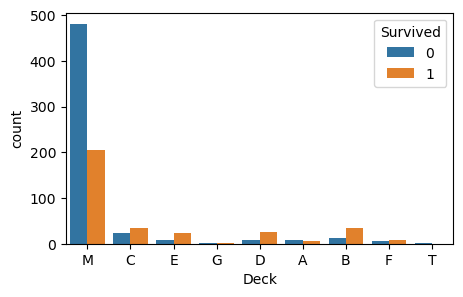

In [29]:
# x - Deck, y - Survived
# sns : 시각화 도구
plt.figure(figsize=(5,3))
sns.countplot(data=train, x='Deck', hue='Survived')
plt.show()

- M에서 상대적으로 사람이 많이 사망했음
- Pclass와 Survived 컬럼의 관계확인(생존/사망 연관)

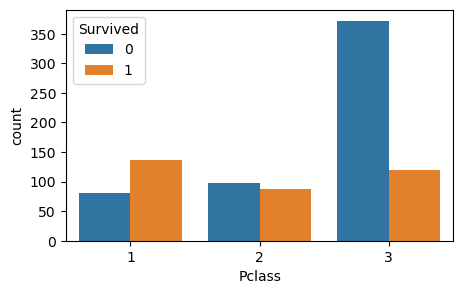

In [30]:
plt.figure(figsize=(5,3))
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.show()

- 승객의 등급이 높을수록 비교적 생존율 높음
- 3등급의 승객들으 많이 사망함

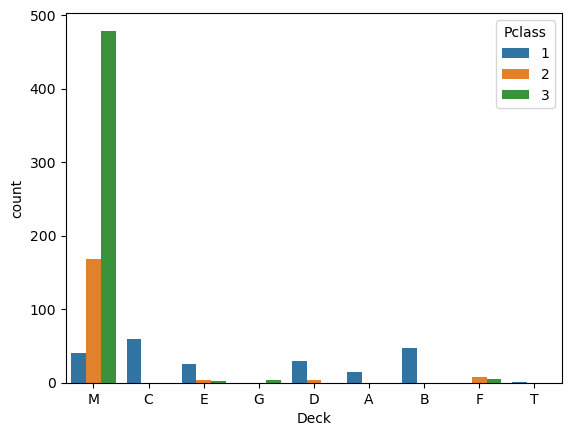

In [31]:
sns.countplot(data=train, x='Deck', hue = 'Pclass')
plt.show()

- M(결측치)에 3등급 사람이 많아서 사망률이 높았나보넹
- Sex와 Survived 관계 확인해보기

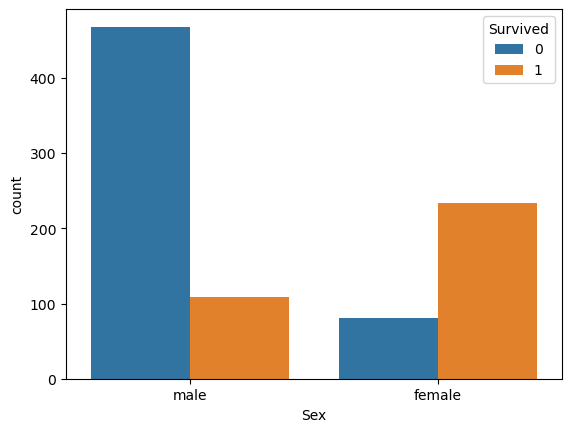

In [32]:
sns.countplot(data=train, x='Sex', hue = 'Survived')
plt.show()

- 남자가 더 많이 죽은듯

- Embarked와 Survived 관계 확인해보기

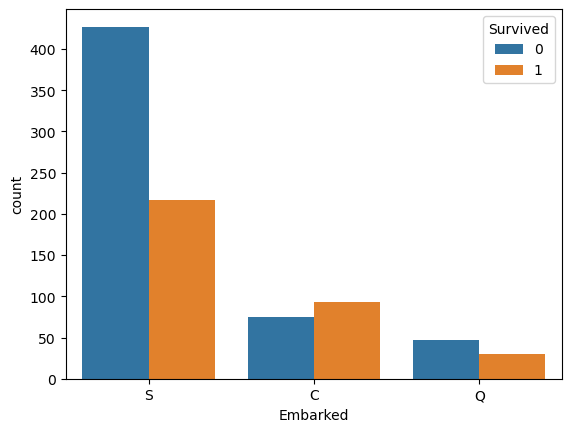

In [33]:
sns.countplot(data=train, x='Embarked', hue = 'Survived')
plt.show()

- S에서 더 많이 죽은듯 => C, Q 순

In [34]:
# Embarked와 Pclass 관계 확인

- Age에 따른 생존/사망 시각화
 - 데이터의 분포를 확인할 때 여러가지 시각화 방법을 활용하는데, 그 중에 하나인 바이올린 풀롯을 활용

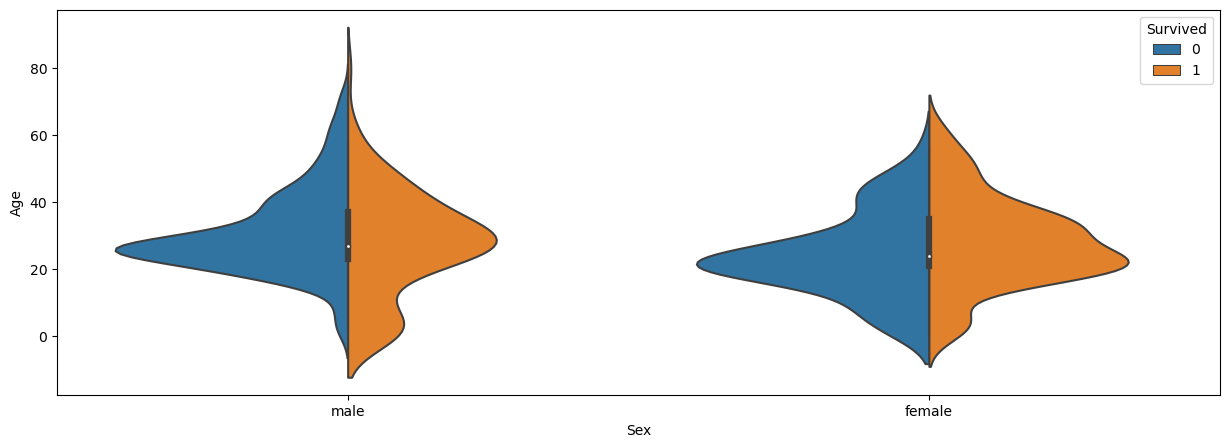

In [35]:
plt.figure(figsize = (15,5)) # x 15, y 5
sns.violinplot(data = train, x = 'Sex', y = 'Age', hue = 'Survived', split = True)
plt.show()

- 20~40대 사이에 사망이 많았음
- 어린아이 중에서는 남자아이가 여자아이에 비해 많이 생존했음
- Fare에 따른 생존/사망 시각화

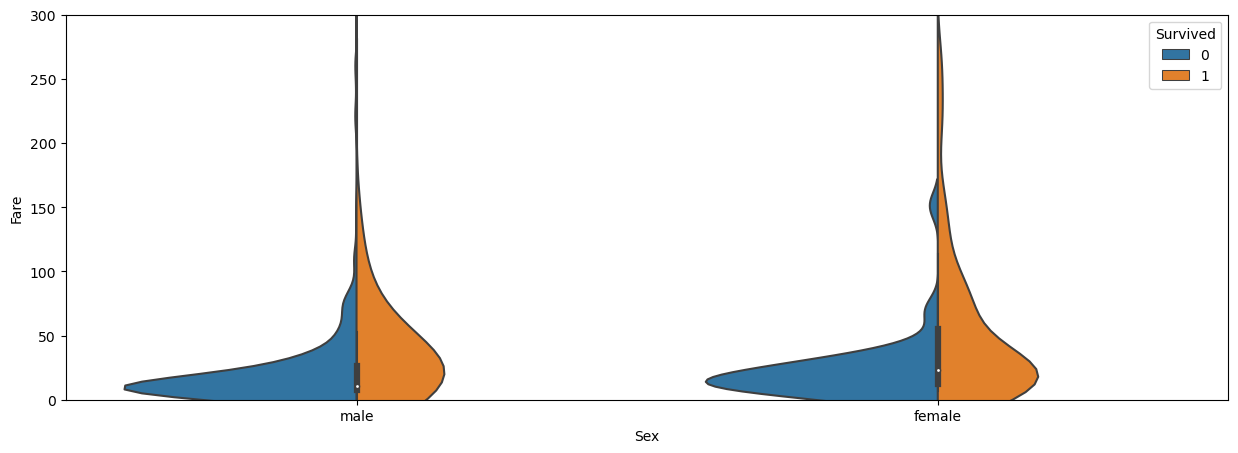

In [36]:
plt.figure(figsize = (15,5)) # x 15, y 5
sns.violinplot(data = train, x = 'Sex', y = 'Fare', hue = 'Survived', split = True)

# 0 ~ 300 y 축 범위 제한
plt.ylim(0,300)
plt.show()

In [37]:
# Fare 기술 통계량 확인
# train['Fare'].describe()

- 요금이 싼사람은 상대적으로 많이 사망함

In [38]:
# 컬럼명 확인
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Deck'],
      dtype='object')

#### 가족의 수 컬럼 생성
 - 기존을 가지고 새로운 컬럼을 생성(특성공학 분야중 1)
 - 가족의 수 : SibSp(형제자매, 배우자) + Parch(부모, 자식) + 1(자신)
 - train, test 두개 모두 컬럼 생성 진행

In [39]:
# SibSp + Parch + 1 => Family_Size 컬럼 추가
# train, test
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
train['Family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 891, dtype: int64

In [40]:
# test 에 Family_Size 컬럼 생성
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1
test['Family_Size']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: Family_Size, Length: 418, dtype: int64

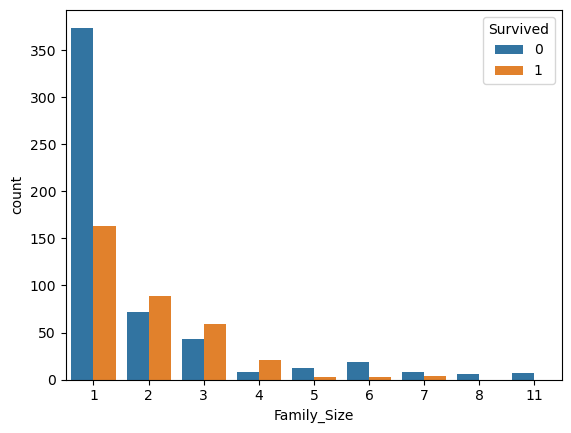

In [41]:
# 가족의 수 컬럼 이용해서 생존/사망 시각화
sns.countplot(data = train, x ='Family_Size', hue = 'Survived')
plt.show()

- 1명 일때는 사망 비율이 높고, 2~4일때는 생존 비율이 높고, 5명이상이면 사망 비율이 높음
- 사소한 관찰의 오류를 줄이기 위해서 범주를 줄여보자(binning)

In [42]:
# 가족의 수 1이면 Alone, 2~4명이면 Small, 5명이상이면 Large
# train, test 적용
# 연속적인 수치값을 범주화(카테고리화) 사용하는 pandas 함수: pd.cut()
user_bins = [0,1,4,11] # 범위의 시작값은 포함되지 x
user_labels = ['Alone', 'Small', 'Large']
train['Family_Group'] = pd.cut(train['Family_Size'],
                              bins = user_bins, labels = user_labels)
test['Family_Group'] = pd.cut(test['Family_Size'],
                              bins = user_bins, labels = user_labels)
train['Family_Group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_Group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [43]:
# 가족의 수 1이면 Alone, 2~4명이면 Small, 5명이상이면 Large
# train, test 적용
# 연속적인 수치값을 범주화(카테고리화) 사용하는 pandas 함수: pd.cut()
user_bins = [0,1,4,11] # 범위의 시작값은 포함되지 x
user_labels = ['Alone', 'Small', 'Large']
train['Family_Group'] = pd.cut(train['Family_Size'],
                              bins = user_bins, labels = user_labels)
test['Family_Group'] = pd.cut(test['Family_Size'],
                              bins = user_bins, labels = user_labels)
train['Family_Group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_Group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

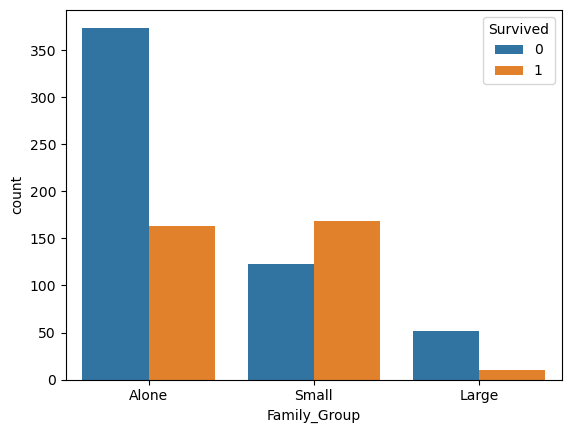

In [44]:
# 가족의 수 컬럼 이용해서 생존/사망 시각화
sns.countplot(data = train, x ='Family_Group', hue = 'Survived')
plt.show()

#### 불필요한 컬럼 삭제
 - .drop(), 삭제할 이름이 있는 방향으로 axis(= 1) 를 설정
 - 전처리 대상에서 제외되거나 전처리 후 불필요한 컬럼 삭제
 - Ticket, Name, Family_Size 삭제
 - train, test 삭제 적용!

In [45]:
# train.drop(Ticket, axis = 1) # Ticket -> 변수 에러
# train.drop('Ticket', axis = 1)
train.drop(['Ticket', 'Name', 'Family_Size'], axis = 1, inplace = True)
test.drop(['Ticket', 'Name', 'Family_Size'], axis = 1, inplace = True)

train.info() # 10개
test.info() # 9개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      889 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 102.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Ag

#### 문제, 답 데이터로 분리

In [46]:
# 훈련문제, 훈련답
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']

# 테스트문제
X_test = test

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    object  
 2   Age           891 non-null    int64   
 3   SibSp         891 non-null    int64   
 4   Parch         891 non-null    int64   
 5   Fare          891 non-null    float64 
 6   Embarked      889 non-null    object  
 7   Deck          891 non-null    object  
 8   Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 95.9+ KB


In [48]:
# 범주 => 수치 (원핫인코딩)
# 인코딩해야하는 컬럼 찾기
# 데이터의 타입에 대한 질문으로 불리언 인덱싱 활용해보기
cat_filter = (X_train.dtypes !='int64') & (X_train.dtypes != 'float64')
cat_choice = X_train.columns[cat_filter]
cat_choice

Index(['Sex', 'Embarked', 'Deck', 'Family_Group'], dtype='object')

In [49]:
# 원핫인코딩 함수 => pd.get_dummies(대상)
X_train_ch_oh = pd.get_dummies(X_train[cat_choice])
# X_test 적용
X_test_ch_oh = pd.get_dummies(X_test[cat_choice])

# X_train과 원핫인코딩 데이터 합치기(병합하기)
X_train = pd.concat([X_train, X_train_ch_oh], axis=1)
X_test =pd.concat([X_test,X_test_ch_oh], axis=1)

# cat_choice 컬럼 삭제하기
X_train.drop(cat_choice,axis=1,inplace=True)
X_test.drop(cat_choice,axis=1,inplace=True)

In [55]:
print(X_train.shape, X_test.shape)
X_train.info()
X_test.info()

(891, 22) (418, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   SibSp               891 non-null    int64  
 3   Parch               891 non-null    int64  
 4   Fare                891 non-null    float64
 5   Sex_female          891 non-null    uint8  
 6   Sex_male            891 non-null    uint8  
 7   Embarked_C          891 non-null    uint8  
 8   Embarked_Q          891 non-null    uint8  
 9   Embarked_S          891 non-null    uint8  
 10  Deck_A              891 non-null    uint8  
 11  Deck_B              891 non-null    uint8  
 12  Deck_C              891 non-null    uint8  
 13  Deck_D              891 non-null    uint8  
 14  Deck_E              891 non-null    uint8  
 15  Deck_F              891 non-null    u